# 1. Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 2. Electricity Consumption Data

## 2.1 Read residential, commercial and industrial consumption between 1960-1989

In [2]:
with open('HS861 1960-1989.xlsx','rb') as f:
    sales_data_1 = pd.read_excel(f, header=[0,1,2],thousands=',')

In [3]:
res_consump_1 = sales_data_1[
    [('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'YEAR'),
     ('Unnamed: 1_level_0', 'Unnamed: 1_level_1', 'STATE'),
     ('RESIDENTIAL', 'Sales', 'Megawatthours'),
     ('COMMERCIAL', 'Sales', 'Megawatthours'),
     ('INDUSTRIAL', 'Sales', 'Megawatthours')]]

In [4]:
res_consump_1.columns = ['Year', 'State', 'Residential', 'Commercial', 'Industrial']

In [5]:
res_consump_1.isnull().sum()

Year           0
State          1
Residential    1
Commercial     1
Industrial     1
dtype: int64

In [6]:
res_consump_1[res_consump_1['State'].isnull()==True]

,Year,State,Residential,Commercial,Industrial
1560,There are no data for customer counts prior to...,NaN,NaN,NaN,NaN


In [7]:
res_consump_1.iloc[-1]['Year']

'There are no data for customer counts prior to 1984 or for revenue or prices prior to 1970.\nTransportation sector data was collected from 1960-1983 and the Other sector data was collected from 1984-2002'

In [8]:
res_consump_1.shape

(1561, 5)

In [9]:
res_consump_1 = res_consump_1[res_consump_1['State'].notnull()]

In [10]:
res_consump_1.shape

(1560, 5)

In [11]:
res_consump_1.isnull().sum()

Year           0
State          0
Residential    0
Commercial     0
Industrial     0
dtype: int64

## 2.2 Read residential, commercial and industrial consumption between 1990-2009

In [12]:
with open('HS861 1990-2009.xlsx','rb') as f:
    sales_data_2 = pd.read_excel(f, header=[0,1,2],thousands=',')

In [13]:
res_consump_2 = sales_data_2[
    [('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Year'),
     ('Unnamed: 1_level_0', 'Unnamed: 1_level_1', 'STATE'),
     ('RESIDENTIAL', 'Sales', 'Megawatthours'),
     ('COMMERCIAL', 'Sales', 'Megawatthours'),
     ('INDUSTRIAL', 'Sales', 'Megawatthours')]]

In [14]:
res_consump_2.columns = ['Year', 'State', 'Residential', 'Commercial', 'Industrial']

In [15]:
res_consump_2.isnull().sum()

Year           0
State          1
Residential    1
Commercial     1
Industrial     1
dtype: int64

In [16]:
res_consump_2[res_consump_2['State'].isnull()==True]

,Year,State,Residential,Commercial,Industrial
1040,The Other sector data was collected from 1990-...,NaN,NaN,NaN,NaN


In [17]:
res_consump_2.iloc[-1]['Year']

'The Other sector data was collected from 1990-2002 and the Transportation sector data was collected from 2003-2009'

In [18]:
res_consump_2.shape

(1041, 5)

In [19]:
res_consump_2 = res_consump_2[res_consump_2['State'].notnull()]

In [20]:
res_consump_2.shape

(1040, 5)

In [21]:
res_consump_2.isnull().sum()

Year           0
State          0
Residential    0
Commercial     0
Industrial     0
dtype: int64

## 2.3 Read residential, commercial and industrial consumption between 2010-2021

In [22]:
with open('HS861 2010- .xlsx','rb') as f:
    sales_data_3 = pd.read_excel(f, header=[0,1,2],thousands=',')

In [23]:
res_consump_3 = sales_data_3[
    [('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Year'),
     ('Unnamed: 1_level_0', 'Unnamed: 1_level_1', 'STATE'),
     ('RESIDENTIAL', 'Sales', 'Megawatthours'),
     ('COMMERCIAL', 'Sales', 'Megawatthours'),
     ('INDUSTRIAL', 'Sales', 'Megawatthours')]]

In [24]:
res_consump_3.columns = ['Year', 'State', 'Residential', 'Commercial', 'Industrial']

In [25]:
res_consump_3.isnull().sum()

Year           0
State          0
Residential    0
Commercial     0
Industrial     0
dtype: int64

## 2.4 Combine consumption data

In [26]:
new_consump = pd.concat([res_consump_1, res_consump_2, res_consump_3])

In [27]:
new_consump.describe()

,Residential,Commercial,Industrial
count,3.224000e+03,3.224000e+03,3.224000e+03
mean,3.548515e+07,3.105402e+07,3.201710e+07
std,1.379019e+08,1.242230e+08,1.172706e+08
min,1.514850e+05,9.944300e+04,4.546300e+04
25%,3.801982e+06,3.485374e+06,3.991897e+06
50%,1.178079e+07,9.003201e+06,1.086391e+07
75%,2.668137e+07,2.179258e+07,2.536319e+07
max,1.470487e+09,1.381755e+09,1.064239e+09


In [28]:
new_consump.head()

,Year,State,Residential,Commercial,Industrial
0,1989,AK,1643441.0,1896990.0,450367.0
1,1989,AL,19842377.0,10516594.0,27232095.0
2,1989,AR,9957250.0,5982183.0,9561666.0
3,1989,AZ,15247500.0,13036593.0,9722031.0
4,1989,CA,64347201.0,75282288.0,55595954.0


### Sort by Year and State abbriviation

In [29]:
new_consump.sort_values(by=['Year', 'State'], inplace=True)

In [30]:
new_consump['Total'] = new_consump['Residential'] + new_consump['Commercial'] + new_consump['Industrial']

In [31]:
new_consump.head()

,Year,State,Residential,Commercial,Industrial,Total
1508,1960,AK,151485.0,99443.0,45463.0,296391.0
1509,1960,AL,4129113.0,2389806.0,8965718.0,15484637.0
1510,1960,AR,1339314.0,1161250.0,3161493.0,5662057.0
1511,1960,AZ,1354534.0,3302246.0,1480827.0,6137607.0
1512,1960,CA,14974822.0,22039107.0,20190290.0,57204219.0


# Maximum Temperature Data

In [32]:
state_abr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [33]:
with open('tasmax_timeseries_annual_cru_1901-2021_USA(1).csv','rb') as f:
    temp_data = pd.read_csv(f, header=[1])

In [34]:
temp_data

,Unnamed: 0,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1901,15.26,22.87,-0.47,23.48,22.72,21.26,15.91,13.22,17.50,...,15.28,19.88,25.88,17.27,10.74,18.41,13.12,16.47,12.48,13.66
1,1902,14.93,23.99,-0.98,23.16,21.90,20.62,15.34,13.68,18.13,...,13.86,20.60,25.78,16.64,10.86,19.24,12.58,17.28,12.34,13.14
2,1903,14.56,23.33,-0.73,23.03,21.41,20.96,14.34,13.69,17.90,...,13.39,20.24,24.21,15.89,11.18,18.81,12.40,17.21,11.54,12.22
3,1904,14.84,24.10,-1.30,24.01,22.21,21.43,15.54,12.20,16.56,...,13.81,20.36,25.72,16.99,9.27,18.04,13.55,16.49,10.67,13.65
4,1905,14.81,23.43,0.40,22.36,21.27,21.15,14.39,13.30,17.86,...,13.64,20.20,24.03,16.21,10.45,18.71,13.11,16.78,11.61,12.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,16.65,24.94,1.73,25.45,23.40,22.42,16.96,16.17,19.59,...,15.75,21.81,27.06,17.95,12.91,20.43,13.61,18.56,13.11,14.26
117,2018,16.21,24.51,2.00,24.94,22.39,22.50,16.64,15.96,19.13,...,14.13,21.15,26.30,17.88,12.80,19.79,14.36,17.85,12.24,13.73
118,2019,15.95,25.22,3.00,23.86,22.37,21.71,15.38,15.73,19.66,...,12.97,21.81,26.23,16.31,12.40,20.70,13.33,18.76,11.60,12.50
119,2020,16.51,24.73,0.51,25.22,22.47,22.87,17.07,16.85,19.97,...,15.97,21.30,27.04,18.05,13.65,20.53,14.31,18.53,13.20,14.74


In [35]:
temp_data.rename(state_abr, axis=1, inplace=True)

In [36]:
temp_data.rename({'United States': 'US', 'Unnamed: 0': 'Year'}, axis=1, inplace=True)

In [37]:
temp_data

,Year,US,AL,AK,AZ,AR,CA,CO,CT,DE,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,1901,15.26,22.87,-0.47,23.48,22.72,21.26,15.91,13.22,17.50,...,15.28,19.88,25.88,17.27,10.74,18.41,13.12,16.47,12.48,13.66
1,1902,14.93,23.99,-0.98,23.16,21.90,20.62,15.34,13.68,18.13,...,13.86,20.60,25.78,16.64,10.86,19.24,12.58,17.28,12.34,13.14
2,1903,14.56,23.33,-0.73,23.03,21.41,20.96,14.34,13.69,17.90,...,13.39,20.24,24.21,15.89,11.18,18.81,12.40,17.21,11.54,12.22
3,1904,14.84,24.10,-1.30,24.01,22.21,21.43,15.54,12.20,16.56,...,13.81,20.36,25.72,16.99,9.27,18.04,13.55,16.49,10.67,13.65
4,1905,14.81,23.43,0.40,22.36,21.27,21.15,14.39,13.30,17.86,...,13.64,20.20,24.03,16.21,10.45,18.71,13.11,16.78,11.61,12.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,16.65,24.94,1.73,25.45,23.40,22.42,16.96,16.17,19.59,...,15.75,21.81,27.06,17.95,12.91,20.43,13.61,18.56,13.11,14.26
117,2018,16.21,24.51,2.00,24.94,22.39,22.50,16.64,15.96,19.13,...,14.13,21.15,26.30,17.88,12.80,19.79,14.36,17.85,12.24,13.73
118,2019,15.95,25.22,3.00,23.86,22.37,21.71,15.38,15.73,19.66,...,12.97,21.81,26.23,16.31,12.40,20.70,13.33,18.76,11.60,12.50
119,2020,16.51,24.73,0.51,25.22,22.47,22.87,17.07,16.85,19.97,...,15.97,21.30,27.04,18.05,13.65,20.53,14.31,18.53,13.20,14.74


# 3. Relations between Max. Temp. and Electricity Consumption
### Filter to keep only data starting 1960

In [38]:
new_temp_data = temp_data[temp_data['Year']>=1960]

In [39]:
new_temp_data

,Year,US,AL,AK,AZ,AR,CA,CO,CT,DE,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
59,1960,15.08,23.18,0.13,23.59,21.62,21.65,15.02,14.54,18.11,...,13.92,19.87,24.69,16.69,11.97,18.83,13.21,16.67,11.78,13.42
60,1961,14.99,23.45,-1.58,23.32,21.78,21.49,14.59,14.49,18.31,...,14.91,20.35,24.78,16.33,11.89,19.11,14.01,16.97,12.37,13.13
61,1962,15.32,24.23,0.08,23.71,22.46,21.21,15.71,14.11,17.86,...,14.09,20.74,25.94,16.65,11.31,18.63,13.32,16.89,11.46,13.49
62,1963,15.63,23.70,0.09,23.71,23.06,20.65,16.33,14.66,18.42,...,15.63,20.53,26.18,16.72,11.53,19.14,13.58,16.88,12.31,14.19
63,1964,14.99,23.65,-1.80,22.60,22.92,20.84,14.87,15.08,18.98,...,14.94,20.98,25.72,15.39,12.14,19.60,12.53,18.07,12.86,12.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,16.65,24.94,1.73,25.45,23.40,22.42,16.96,16.17,19.59,...,15.75,21.81,27.06,17.95,12.91,20.43,13.61,18.56,13.11,14.26
117,2018,16.21,24.51,2.00,24.94,22.39,22.50,16.64,15.96,19.13,...,14.13,21.15,26.30,17.88,12.80,19.79,14.36,17.85,12.24,13.73
118,2019,15.95,25.22,3.00,23.86,22.37,21.71,15.38,15.73,19.66,...,12.97,21.81,26.23,16.31,12.40,20.70,13.33,18.76,11.60,12.50
119,2020,16.51,24.73,0.51,25.22,22.47,22.87,17.07,16.85,19.97,...,15.97,21.30,27.04,18.05,13.65,20.53,14.31,18.53,13.20,14.74


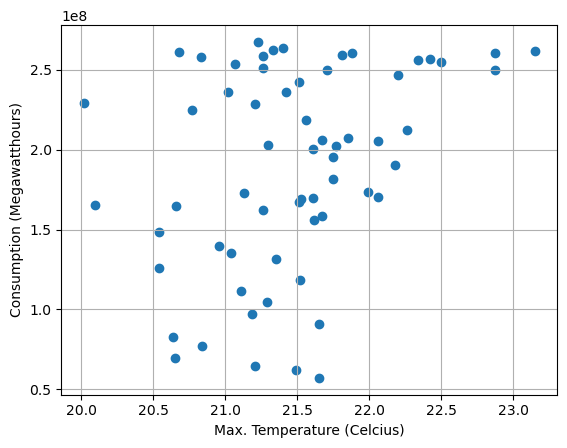

In [40]:
x = new_temp_data['CA']
y = new_consump[new_consump['State'] == 'CA']['Total']

plt.scatter(x, y)
plt.xlabel('Max. Temperature (Celcius)')
plt.ylabel('Consumption (Megawatthours)')
plt.grid()
# for i in range(len(x)):
#     plt.annotate(new_temp_data['Year'].iloc[i], (x.iloc[i], y.iloc[i]))

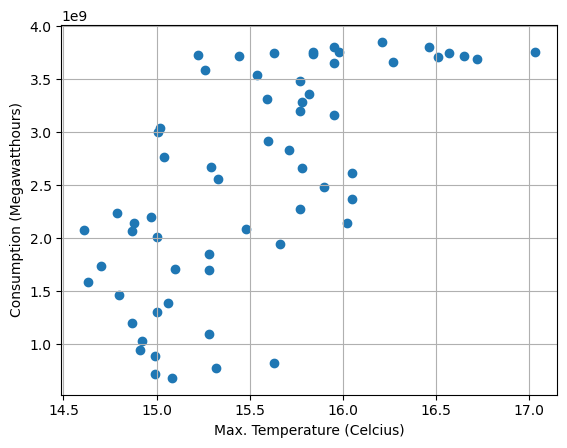

In [41]:
x = new_temp_data['US']
y = new_consump[new_consump['State'] == 'US']['Total']

plt.scatter(x, y)
plt.xlabel('Max. Temperature (Celcius)')
plt.ylabel('Consumption (Megawatthours)')
plt.grid()
# for i in range(len(x)):
#     plt.annotate(new_temp_data['Year'].iloc[i], (x.iloc[i], y.iloc[i]))

While we some correlation between maximum temperature and electricity consumption, there is huge amount of variance in the data.

# 4. Linear Model

In [42]:
x = np.array(new_temp_data['US']).reshape(-1, 1)
y = new_consump[new_consump['State'] == 'US']['Total']
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.4456937998177726